In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import os

In [4]:
dir_base = '/content/drive/MyDrive/Colab/'

datasets = ['gtfsSP0810','gtfsSP0910','gtfsSP1010', 'gtfsSP1110', 'gtfsSP1410','gtfsSP1510','gtfsSP1610','gtfsSP1710','gtfsSP1810','gtfsSP2110','gtfsSP2210','gtfsSP2410','gtfsSP2510','gtfsSP2810','gtfsSP2910','gtfsSP3010','gtfsSP3110','gtfsSP0111','gtfsSP0411','gtfsSP0511','gtfsSP0811','gtfsSP1111','gtfsSP1211','gtfsSP1311','gtfsSP1411',]  # Aqui você pode adicionar todos os datasets que deseja juntar

output_dir = '/content/drive/MyDrive/Colab/gtfsSP_consolidado/'

os.makedirs(output_dir, exist_ok=True)

arquivos_txt = ['frequencies.txt', 'trips.txt', 'routes.txt', 'stop_times.txt', 'stops.txt']

def combinar_arquivos_por_tipo(nome_arquivo):
    df_list = []

    for dataset in datasets:
        caminho_arquivo = os.path.join(dir_base, dataset, nome_arquivo)
        if os.path.exists(caminho_arquivo):
            df = pd.read_csv(caminho_arquivo, delimiter=',')
            df_list.append(df)
        else:
            print(f"Arquivo {nome_arquivo} não encontrado no dataset {dataset}")

    df_concatenado = pd.concat(df_list, ignore_index=True)
    return df_concatenado

for arquivo in arquivos_txt:
    df_consolidado = combinar_arquivos_por_tipo(arquivo)
    caminho_saida = os.path.join(output_dir, arquivo)

    df_consolidado.to_csv(caminho_saida, index=False)
    print(f"Arquivo consolidado salvo em: {caminho_saida}")



Arquivo consolidado salvo em: /content/drive/MyDrive/Colab/gtfsSP_consolidado/frequencies.txt
Arquivo consolidado salvo em: /content/drive/MyDrive/Colab/gtfsSP_consolidado/trips.txt
Arquivo consolidado salvo em: /content/drive/MyDrive/Colab/gtfsSP_consolidado/routes.txt
Arquivo consolidado salvo em: /content/drive/MyDrive/Colab/gtfsSP_consolidado/stop_times.txt
Arquivo consolidado salvo em: /content/drive/MyDrive/Colab/gtfsSP_consolidado/stops.txt


In [5]:
dir_consolidado = '/content/drive/MyDrive/Colab/gtfsSP_consolidado/'

frequencies = pd.read_csv(dir_consolidado +'frequencies.txt', delimiter=',')
trips = pd.read_csv(dir_consolidado +'trips.txt', delimiter=',')
routes = pd.read_csv(dir_consolidado +'routes.txt', delimiter=',')
stop_times = pd.read_csv(dir_consolidado + 'stop_times.txt',delimiter=',')
stops = pd.read_csv(dir_consolidado + 'stops.txt',delimiter=',')

# **Quais linhas de ônibus têm os maiores tempos de espera e quais são as mais pontuais?**

In [6]:
print(frequencies.head)
print(trips.head)
print(routes.head)
print(len(stop_times))

<bound method NDFrame.head of            trip_id start_time  end_time  headway_secs
0        1012-10-0   00:00:00  00:59:00          1200
1        1012-10-0   01:00:00  01:59:00          3600
2        1012-10-0   05:00:00  05:59:00           420
3        1012-10-0   06:00:00  06:59:00           480
4        1012-10-0   07:00:00  07:59:00           600
...            ...        ...       ...           ...
1002353  N843-11-0   00:00:00  00:59:00          1800
1002354  N843-11-0   01:00:00  01:59:00          3600
1002355  N843-11-0   02:00:00  02:59:00          1800
1002356  N843-11-0   03:00:00  03:59:00          3600
1002357  N843-11-0   04:00:00  04:59:00          3600

[1002358 rows x 4 columns]>
<bound method NDFrame.head of       route_id service_id    trip_id         trip_headsign  direction_id  \
0      1012-10        USD  1012-10-0        Jd. Monte Belo             0   
1      1012-10        USD  1012-10-1    Term. Jd. Britania             1   
2      1012-21        U__  1012-21-

In [7]:
datasets1 = [frequencies, trips, routes]
for dataset in datasets1:
    dataset.fillna('Não informado', inplace=True)

for name, dataset in zip(['frequencies', 'trips', 'routes'], datasets1):
    print(f"Valores nulos restantes no dataset {name}:")
    print(dataset.isnull().sum())

Valores nulos restantes no dataset frequencies:
trip_id         0
start_time      0
end_time        0
headway_secs    0
dtype: int64
Valores nulos restantes no dataset trips:
route_id         0
service_id       0
trip_id          0
trip_headsign    0
direction_id     0
shape_id         0
dtype: int64
Valores nulos restantes no dataset routes:
route_id            0
agency_id           0
route_short_name    0
route_long_name     0
route_type          0
route_color         0
route_text_color    0
dtype: int64


In [8]:
tempo_medio_espera_trip = frequencies.groupby('trip_id')['headway_secs'].mean().reset_index()

tempo_medio_espera_linhas = pd.merge(tempo_medio_espera_trip, trips[['trip_id', 'route_id']], on='trip_id')

tempo_medio_espera_linhas = tempo_medio_espera_linhas.groupby('route_id')['headway_secs'].mean().reset_index()

linhas_tempo_espera = pd.merge(tempo_medio_espera_linhas, routes[['route_id', 'route_short_name', 'route_long_name']], on='route_id')

linhas_tempo_espera['headway_mins'] = linhas_tempo_espera['headway_secs'] / 60
linhas_tempo_espera['headway_hours'] = linhas_tempo_espera['headway_secs'] / 3600

print(linhas_tempo_espera[['route_short_name', 'route_long_name', 'headway_secs', 'headway_mins', 'headway_hours']].head())

  route_short_name                      route_long_name  headway_secs  \
0          1012-10  Term. Jd. Britania - Jd. Monte Belo    777.142857   
1          1012-10  Term. Jd. Britania - Jd. Monte Belo    777.142857   
2          1012-10  Term. Jd. Britania - Jd. Monte Belo    777.142857   
3          1012-10  Term. Jd. Britania - Jd. Monte Belo    777.142857   
4          1012-10  Term. Jd. Britania - Jd. Monte Belo    777.142857   

   headway_mins  headway_hours  
0     12.952381       0.215873  
1     12.952381       0.215873  
2     12.952381       0.215873  
3     12.952381       0.215873  
4     12.952381       0.215873  


<ipython-input-9-77a010d2c4f9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='headway_mins', data=linhas_tempo_espera, palette="bright")


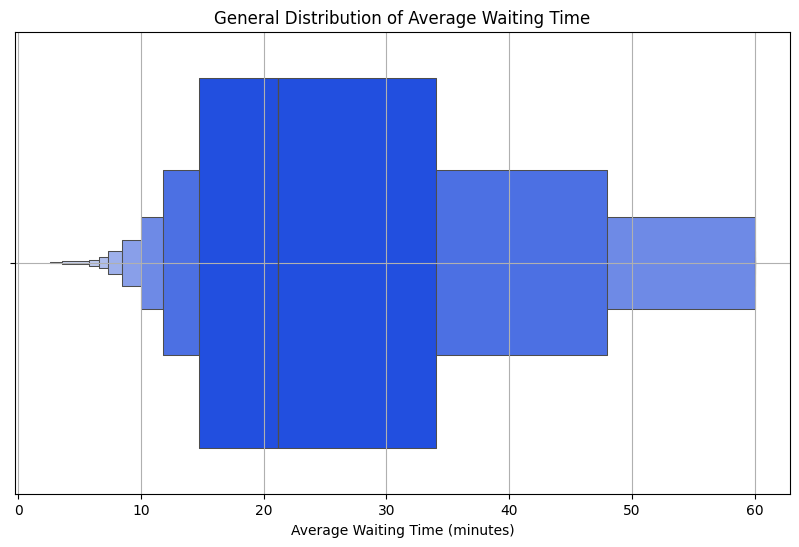

In [9]:
plt.figure(figsize=(10, 6))
sns.boxenplot(x='headway_mins', data=linhas_tempo_espera, palette="bright")
plt.xlabel('Average Waiting Time (minutes)')
plt.title('General Distribution of Average Waiting Time')
plt.grid(True)
plt.show()


In [10]:
print(len(linhas_tempo_espera))

32779


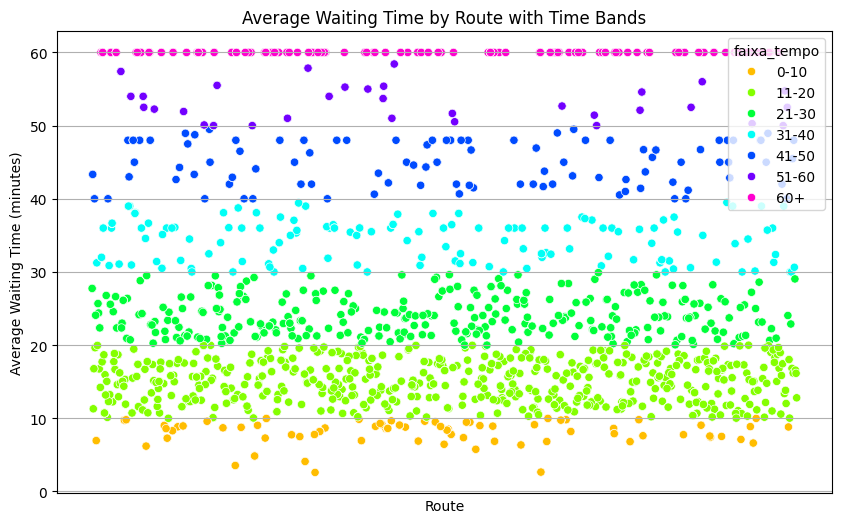

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bins = [0, 10, 20, 30, 40, 50, 60, float('inf')]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '60+']
linhas_tempo_espera['faixa_tempo'] = pd.cut(linhas_tempo_espera['headway_mins'], bins=bins, labels=labels, right=False)

sampled_data = linhas_tempo_espera.sample(frac=0.1, random_state=0)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='route_short_name', y='headway_mins', hue='faixa_tempo', data=sampled_data, palette='hsv')
plt.xlabel('Route')
plt.ylabel('Average Waiting Time (minutes)')
plt.title('Average Waiting Time by Route with Time Bands')
plt.xticks(rotation=90)
plt.xticks([])
plt.grid(True)
plt.show()

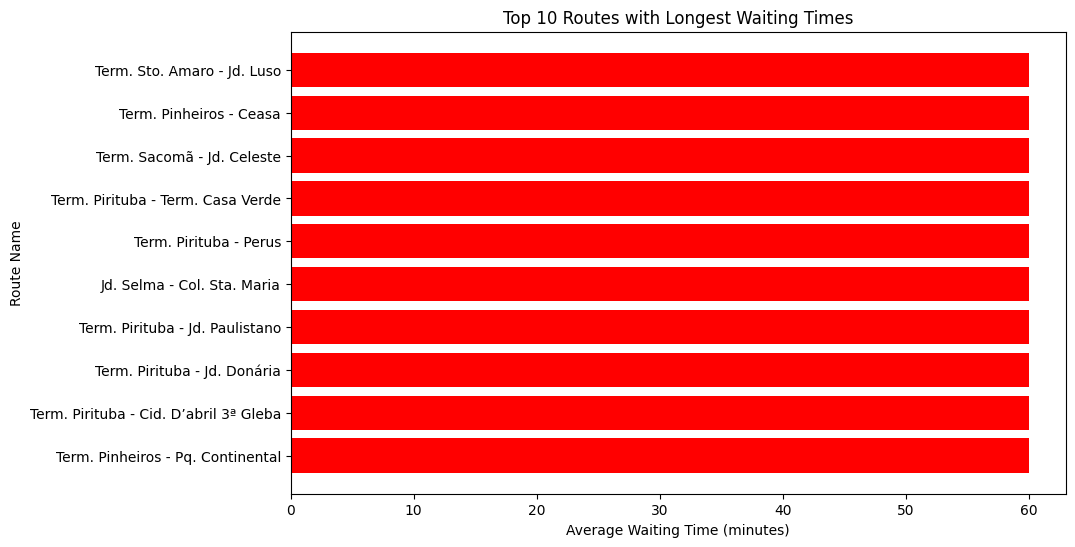

In [12]:
import matplotlib.pyplot as plt

linhas_tempo_espera_unicas = linhas_tempo_espera.groupby('route_long_name').max('headway_mins').reset_index()

linhas_tempo_espera_unicas = linhas_tempo_espera_unicas.sort_values('headway_mins', ascending=False)

top_10_maiores = linhas_tempo_espera_unicas.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_maiores['route_long_name'], top_10_maiores['headway_mins'], color='red')
plt.xlabel('Average Waiting Time (minutes)')
plt.ylabel('Route Name')
plt.title('Top 10 Routes with Longest Waiting Times')
plt.gca().invert_yaxis()
plt.show()

In [13]:
print(top_10_maiores['route_long_name'])

998               Term. Sto. Amaro - Jd. Luso
948                   Term. Pinheiros - Ceasa
974                Term. Sacomã - Jd. Celeste
963         Term. Pirituba - Term. Casa Verde
960                    Term. Pirituba - Perus
493               Jd. Selma - Col. Sta. Maria
956           Term. Pirituba - Jd. Paulistano
955              Term. Pirituba - Jd. Donária
954    Term. Pirituba - Cid. D’abril 3ª Gleba
951         Term. Pinheiros - Pq. Continental
Name: route_long_name, dtype: object


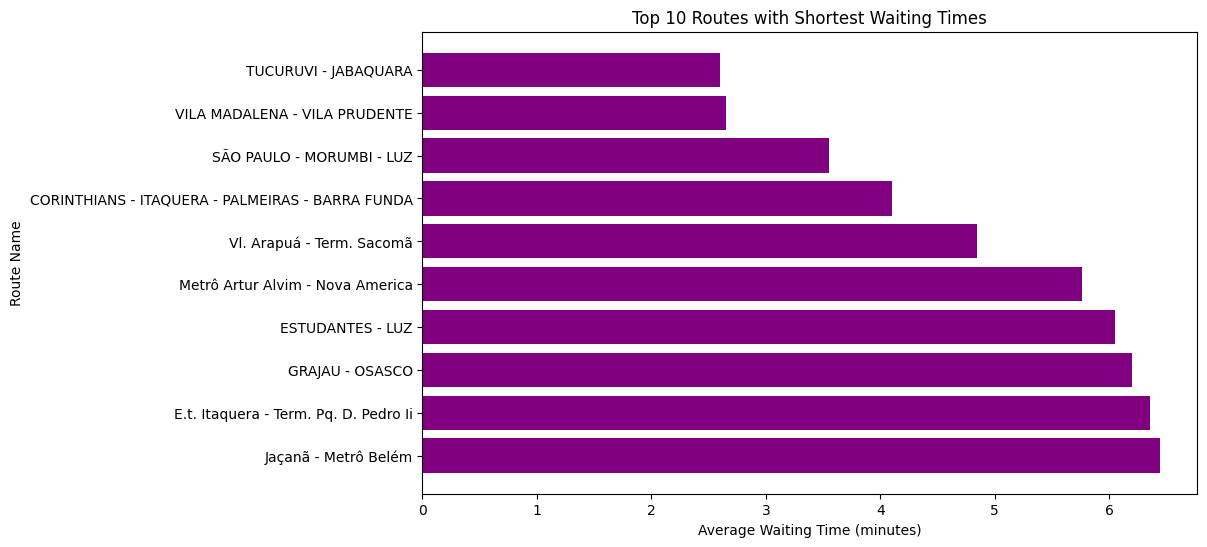

In [14]:
import matplotlib.pyplot as plt

linhas_tempo_espera_unicas = linhas_tempo_espera.groupby('route_long_name').min('headway_mins').reset_index()

linhas_tempo_espera_unicas = linhas_tempo_espera_unicas.sort_values('headway_mins', ascending=True)

top_10_menores = linhas_tempo_espera_unicas.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_menores['route_long_name'], top_10_menores['headway_mins'], color='purple')
plt.xlabel('Average Waiting Time (minutes)')
plt.ylabel('Route Name')
plt.title('Top 10 Routes with Shortest Waiting Times')
plt.gca().invert_yaxis()
plt.show()

In [15]:
print(stop_times.head(0))
print(linhas_tempo_espera.head(0))

Empty DataFrame
Columns: [trip_id, arrival_time, departure_time, stop_id, stop_sequence]
Index: []
Empty DataFrame
Columns: [route_id, headway_secs, route_short_name, route_long_name, headway_mins, headway_hours, faixa_tempo]
Index: []


In [16]:
linhas_com_trips = linhas_tempo_espera.merge(trips[['route_id', 'trip_id']], on='route_id', how='left')
linhas_com_trips_amostragem = linhas_com_trips.sample(frac=0.01, random_state=41)

print(linhas_com_trips_amostragem[['route_id', 'trip_id']].head())

        route_id    trip_id
500843   425E-10  425E-10-0
1320004  N304-11  N304-11-0
753111   6053-10  6053-10-1
626433   5175-10  5175-10-1
888215   6820-10  6820-10-1


In [17]:
linhas_com_horarios = linhas_com_trips_amostragem.merge(stop_times[['trip_id', 'stop_id', 'arrival_time']], on='trip_id', how='left')

print(linhas_com_horarios[['trip_id', 'stop_id', 'arrival_time']].head())

     trip_id    stop_id arrival_time
0  425E-10-0  780006749     18:00:00
1  425E-10-0  780006804     18:01:58
2  425E-10-0  780006805     18:03:56
3  425E-10-0  780006806     18:05:54
4  425E-10-0  780006807     18:07:52


In [18]:
print(len(linhas_com_horarios))

15281582


In [19]:
linhas_com_horarios_amostradas = linhas_com_horarios.sample(frac=0.01, random_state=42)  # random_state para reprodutibilidade
print(len(linhas_com_horarios_amostradas))

152816


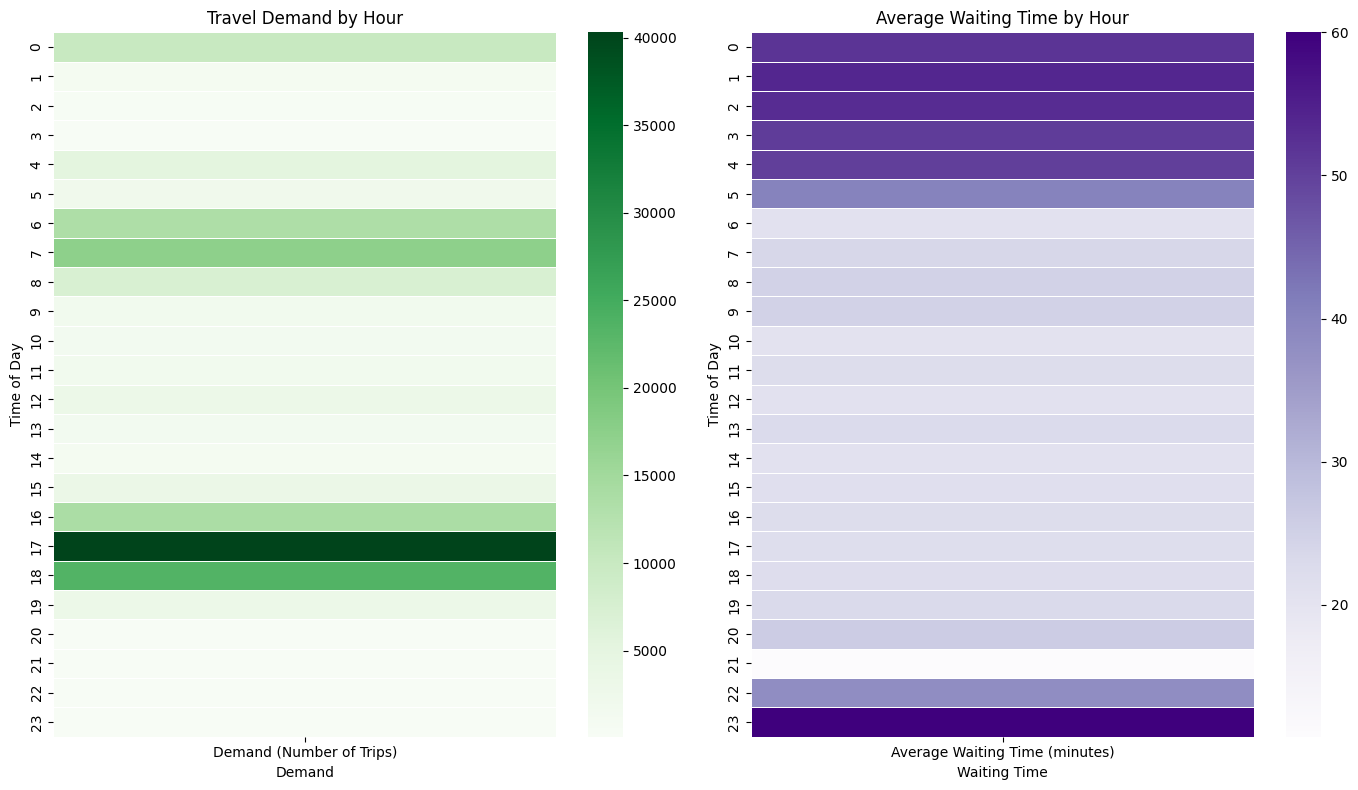

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

linhas_com_horarios_amostradas['hora'] = pd.to_datetime(linhas_com_horarios_amostradas['arrival_time'], format='%H:%M:%S', errors='coerce').dt.hour

demanda_por_hora = linhas_com_horarios_amostradas.groupby('hora').size()

espera_media_por_hora = linhas_com_horarios_amostradas.groupby('hora')['headway_mins'].mean()

df_heatmap = pd.DataFrame({
    'Demand (Number of Trips)': demanda_por_hora,
    'Average Waiting Time (minutes)': espera_media_por_hora
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

sns.heatmap(df_heatmap[['Demand (Number of Trips)']], cmap='Greens', linewidths=0.5, ax=ax1, annot=False)
ax1.set_title('Travel Demand by Hour')
ax1.set_ylabel('Time of Day')
ax1.set_xlabel('Demand')

sns.heatmap(df_heatmap[['Average Waiting Time (minutes)']], cmap='Purples', linewidths=0.5, ax=ax2, annot=False)
ax2.set_title('Average Waiting Time by Hour')
ax2.set_ylabel('Time of Day')
ax2.set_xlabel('Waiting Time')

plt.tight_layout()
plt.show()

# **Como a introdução de veículos autônomos poderia impactar os tempos de viagem e a frequência dos serviços?**

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

caminho_arquivo = '/content/drive/MyDrive/Colab/secseg/OcorrenciaMensal(Criminal)-São Paulo_20241008_171533.csv'

df = pd.read_csv(caminho_arquivo, delimiter=';')

print("Colunas no DataFrame:", df.columns)

if 'Natureza' not in df.columns:
    raise ValueError("A coluna 'Natureza' não foi encontrada no DataFrame.")

dados_lesao_culposa = df[df['Natureza'] == 'LESÃO CORPORAL CULPOSA POR ACIDENTE DE TRÂNSITO'].T.iloc[1:-1]

dados_lesao_culposa.columns = ['Quantidade']
dados_lesao_culposa.index.name = 'Meses'

Colunas no DataFrame: Index(['Natureza', 'Janeiro', 'Fevereiro', 'Marco', 'Abril', 'Maio', 'Junho',
       'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro',
       'Total'],
      dtype='object')


<ipython-input-32-0cfb60de6c7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totais_ocorrencias['Total'] = pd.to_numeric(totais_ocorrencias['Total'], errors='coerce')
<ipython-input-32-0cfb60de6c7b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=totais_ocorrencias, x='Natureza', y='Total', palette='Wistia')


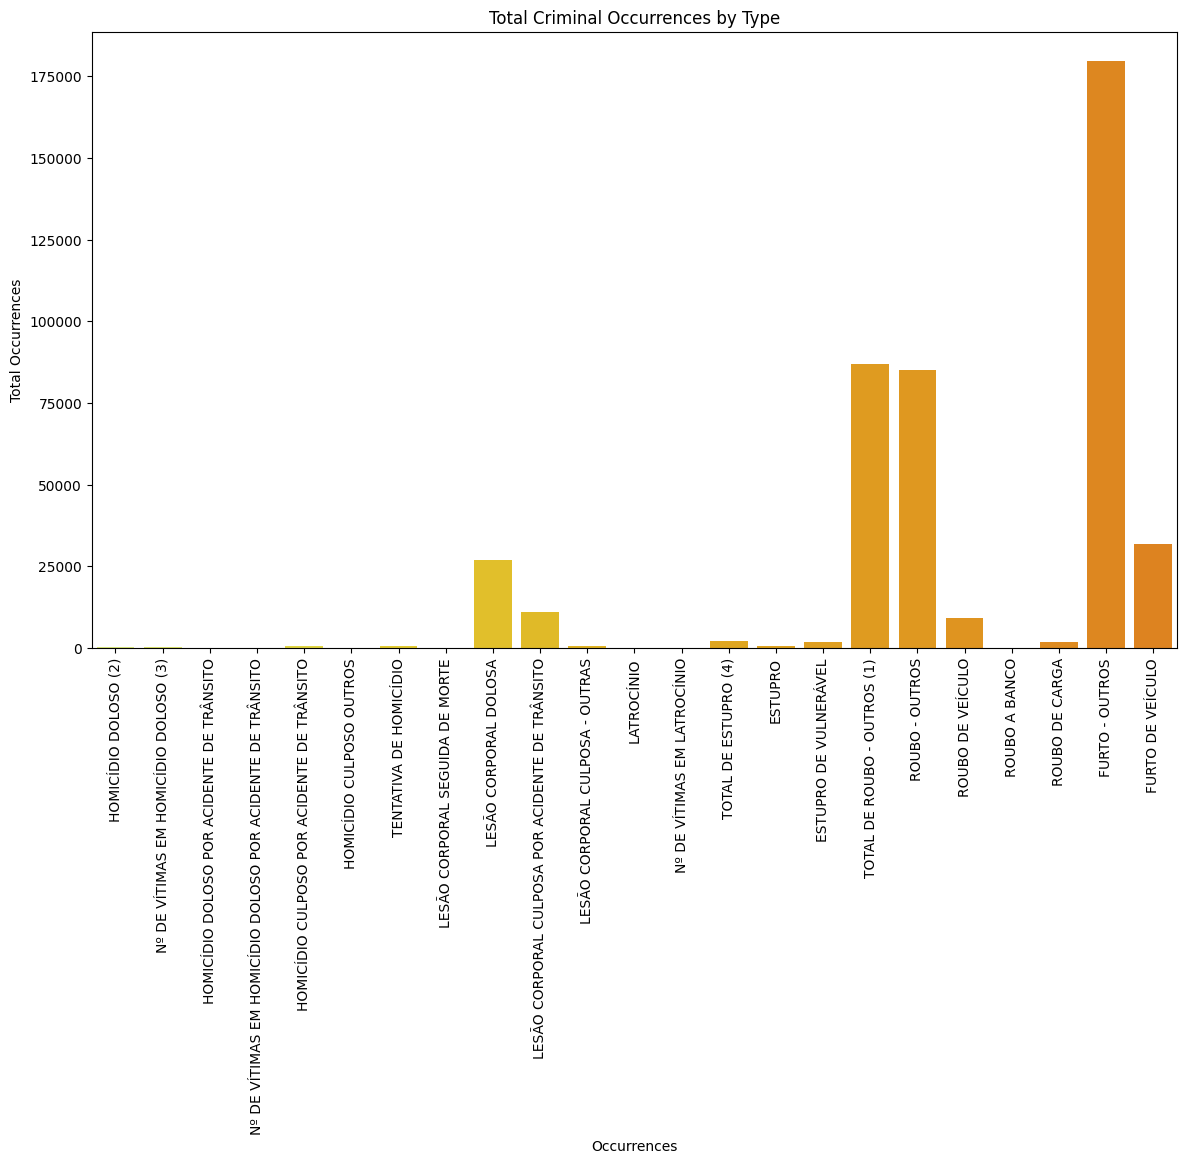

In [32]:
totais_ocorrencias = df[['Natureza', 'Total']]
totais_ocorrencias['Total'] = pd.to_numeric(totais_ocorrencias['Total'], errors='coerce')

plt.figure(figsize=(14, 8))
sns.barplot(data=totais_ocorrencias, x='Natureza', y='Total', palette='Wistia')
plt.xlabel('Occurrences')
plt.ylabel('Total Occurrences')
plt.title('Total Criminal Occurrences by Type')
plt.xticks(rotation=90)
plt.show()


<ipython-input-50-b1503cd79613>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totais_ocorrencias['Total'] = pd.to_numeric(totais_ocorrencias['Total'], errors='coerce')
<ipython-input-50-b1503cd79613>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=totais_ocorrencias, x='Natureza', y='Total', palette=cores)


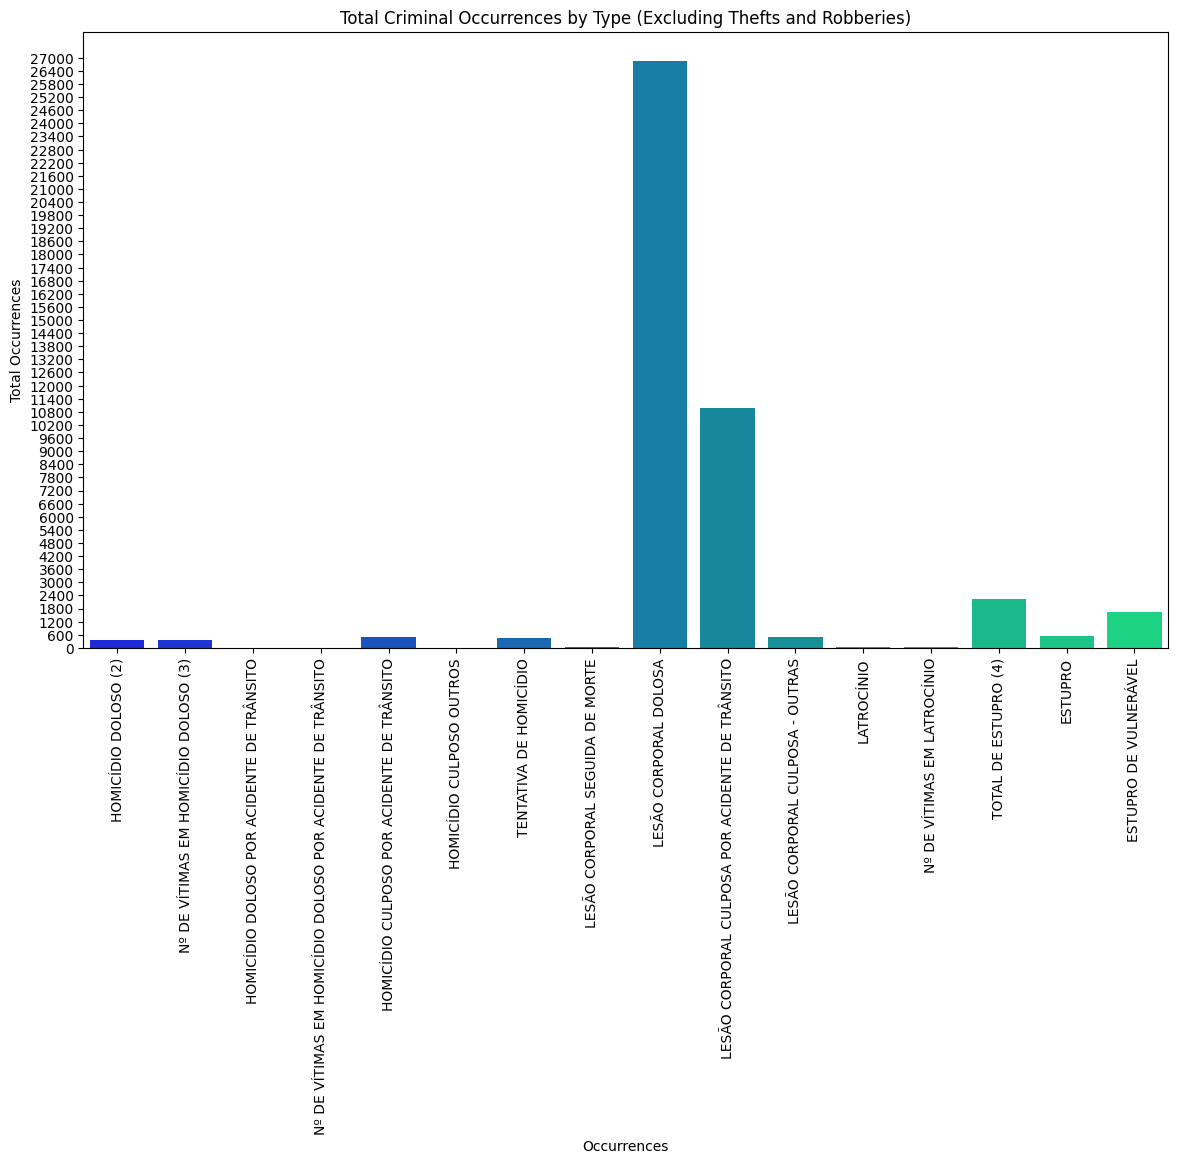

In [50]:
ocorrencias_excluir = [
    'FURTO - OUTROS', 'FURTO DE VEÍCULO',
    'ROUBO - OUTROS', 'ROUBO DE VEÍCULO',
    'ROUBO A BANCO', 'ROUBO DE CARGA'
]
totais_ocorrencias = df[~df['Natureza'].str.contains('FURTO|ROUBO', case=False, na=False)]

totais_ocorrencias['Total'] = pd.to_numeric(totais_ocorrencias['Total'], errors='coerce')

cores = sns.color_palette("winter", len(totais_ocorrencias))

plt.figure(figsize=(14, 8))
barplot = sns.barplot(data=totais_ocorrencias, x='Natureza', y='Total', palette=cores)

plt.yticks(np.arange(0, totais_ocorrencias['Total'].max() + 600, 600))
plt.xlabel('Occurrences')
plt.ylabel('Total Occurrences')
plt.title('Total Criminal Occurrences by Type (Excluding Thefts and Robberies)')
plt.xticks(rotation=90)
plt.show()

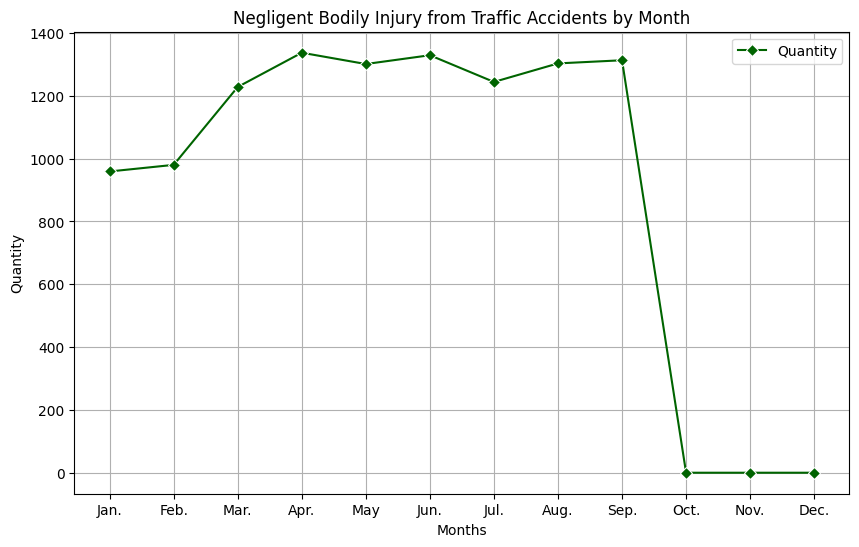

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

cor_especifica = ['#006400']

palette_personalizada = sns.color_palette(cor_especifica)

plt.figure(figsize=(10, 6))
sns.lineplot(data=dados_lesao_culposa, marker='D', palette=palette_personalizada)
plt.xlabel('Months')
plt.ylabel('Quantity')
plt.title('Negligent Bodily Injury from Traffic Accidents by Month')
plt.xticks(ticks=range(12), labels=['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'Jun.', 'Jul.', 'Aug.', 'Sep.', 'Oct.', 'Nov.', 'Dec.'])
plt.grid(True)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['Quantity'], title='')

plt.show()

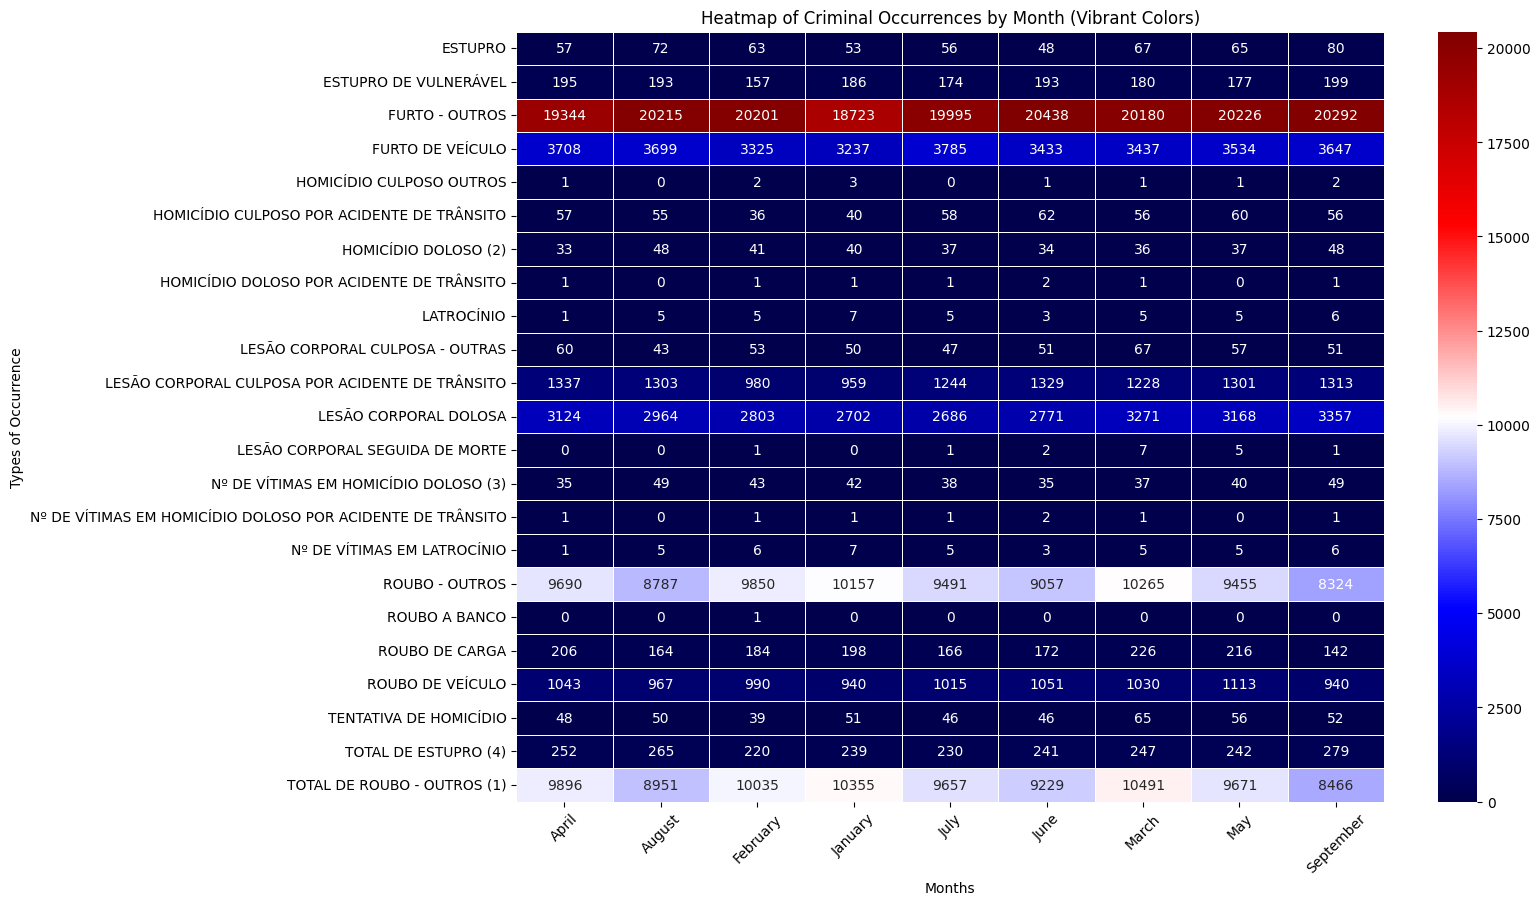

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Caminho para o arquivo CSV
caminho_ocorrencias = '/content/drive/MyDrive/Colab/secseg/OcorrenciaMensal(Criminal)-São Paulo_20241008_171533.csv'

# Carregar os dados
df_ocorrencias = pd.read_csv(caminho_ocorrencias, delimiter=';')

# Mudar os meses para inglês
meses_portugues = ['Janeiro', 'Fevereiro', 'Marco', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro']
meses_ingles = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September']

# Renomear as colunas para inglês
df_ocorrencias.rename(columns=dict(zip(meses_portugues, meses_ingles)), inplace=True)

# Aplicar a conversão de valores numéricos
df_ocorrencias[meses_ingles] = df_ocorrencias[meses_ingles].apply(pd.to_numeric, errors='coerce')

# Derreter o dataframe para criar um formato adequado para o heatmap
df_melted = df_ocorrencias.melt(id_vars='Natureza', value_vars=meses_ingles, var_name='Month', value_name='Quantity')

# Criar a tabela pivô para o heatmap
df_heatmap = pd.pivot_table(df_melted, values='Quantity', index='Natureza', columns='Month', aggfunc='sum', fill_value=0)

# Plotar o heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df_heatmap, cmap='seismic', annot=True, linewidths=.5, fmt='d')
plt.title('Heatmap of Criminal Occurrences by Month (Vibrant Colors)')
plt.xlabel('Months')
plt.ylabel('Types of Occurrence')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


# **Quais áreas da cidade são menos atendidas pelo transporte público atual**

In [78]:
paradas_por_area = stops.groupby('stop_id').size().reset_index(name='numero_paradas')

print(paradas_por_area.sort_values('numero_paradas').head(10))


         stop_id  numero_paradas
0          18839               1
2348     3115339               2
3601     4203935               2
3999     4614924               2
5154     6415396               3
21697  950006689               4
21696  950006688               4
8711   120015821               4
3598     4203932               4
3600     4203934               4


In [79]:
lat_bins = np.linspace(stops['stop_lat'].min(), stops['stop_lat'].max(), num=10)
lon_bins = np.linspace(stops['stop_lon'].min(), stops['stop_lon'].max(), num=10)

stops['lat_bin'] = pd.cut(stops['stop_lat'], bins=lat_bins, labels=False)
stops['lon_bin'] = pd.cut(stops['stop_lon'], bins=lon_bins, labels=False)

paradas_por_grid = stops.groupby(['lat_bin', 'lon_bin']).size().reset_index(name='numero_paradas')

print(paradas_por_grid.sort_values('numero_paradas').head())

    lat_bin  lon_bin  numero_paradas
34      6.0      5.0              25
37      8.0      2.0              50
29      5.0      7.0              50
4       1.0      4.0              50
36      8.0      1.0              50


In [80]:
stop_times_amostragem = stop_times.sample(frac=0.001, random_state=42)
trips_amostragem = trips[['trip_id']]

paradas_trips = stop_times_amostragem.merge(trips_amostragem, on='trip_id')
print(f"Tamanho de paradas_trips após o merge: {len(paradas_trips)}")

frequencies_amostragem = frequencies[['trip_id', 'headway_secs']].sample(frac=0.001, random_state=43)
paradas_frequencia = paradas_trips.merge(frequencies_amostragem, on='trip_id')
print(f"Tamanho de paradas_frequencia após o merge: {len(paradas_frequencia)}")

stops_amostragem = stops[['stop_id', 'stop_lat', 'stop_lon']]
paradas_frequencia_final = paradas_frequencia.merge(stops_amostragem, on='stop_id')
print(f"Tamanho de paradas_frequencia_final após o merge: {len(paradas_frequencia_final)}")

print(paradas_frequencia_final[['stop_id', 'trip_id', 'headway_secs', 'stop_lat', 'stop_lon']].head())

Tamanho de paradas_trips após o merge: 61025
Tamanho de paradas_frequencia após o merge: 27450
Tamanho de paradas_frequencia_final após o merge: 686200
     stop_id    trip_id  headway_secs  stop_lat   stop_lon
0  530015289  967A-10-1           900 -23.57387 -46.655265
1  530015289  967A-10-1           900 -23.57387 -46.655265
2  530015289  967A-10-1           900 -23.57387 -46.655265
3  530015289  967A-10-1           900 -23.57387 -46.655265
4  530015289  967A-10-1           900 -23.57387 -46.655265


In [81]:
stop_times_amostragem = stop_times.sample(frac=0.00001, random_state=43)
print(f"Tamanho da amostragem de stop_times: {len(stop_times_amostragem)}")

trip_ids_amostrados = stop_times_amostragem['trip_id'].unique()

trips_filtrados = trips[trips['trip_id'].isin(trip_ids_amostrados)]

frequencies_filtrados = frequencies[frequencies['trip_id'].isin(trip_ids_amostrados)]

paradas_frequencia = stop_times_amostragem.merge(trips_filtrados, on="trip_id", how="inner")
paradas_frequencia = paradas_frequencia.merge(frequencies_filtrados, on="trip_id", how="inner")

paradas_frequencia = paradas_frequencia.merge(
    stops[['stop_id', 'stop_lat', 'stop_lon']], on="stop_id", how="inner"
)

print(f"Colunas disponíveis após merge: {paradas_frequencia.columns}")

lat_bins = np.linspace(paradas_frequencia['stop_lat'].min(), paradas_frequencia['stop_lat'].max(), 50)
lon_bins = np.linspace(paradas_frequencia['stop_lon'].min(), paradas_frequencia['stop_lon'].max(), 50)

paradas_frequencia['lat_bin'] = pd.cut(paradas_frequencia['stop_lat'], bins=lat_bins, labels=False)
paradas_frequencia['lon_bin'] = pd.cut(paradas_frequencia['stop_lon'], bins=lon_bins, labels=False)

frequencia_por_grid = (
    paradas_frequencia.groupby(['lat_bin', 'lon_bin'])['headway_secs']
    .mean()
    .reset_index(name='frequencia_media')
)

paradas_por_grid = (
    paradas_frequencia.groupby(['lat_bin', 'lon_bin'])
    .size()
    .reset_index(name='numero_paradas')
)

grid_analise = paradas_por_grid.merge(frequencia_por_grid, on=['lat_bin', 'lon_bin'], how='left')

print(f"Tamanho do grid_analise: {len(grid_analise)}")

resultado = grid_analise.sort_values(['numero_paradas', 'frequencia_media'], ascending=[True, True])
print(resultado.head())

Tamanho da amostragem de stop_times: 24
Colunas disponíveis após merge: Index(['trip_id', 'arrival_time', 'departure_time', 'stop_id', 'stop_sequence',
       'route_id', 'service_id', 'trip_headsign', 'direction_id', 'shape_id',
       'start_time', 'end_time', 'headway_secs', 'stop_lat', 'stop_lon'],
      dtype='object')
Tamanho do grid_analise: 22
    lat_bin  lon_bin  numero_paradas  frequencia_media
6      32.0     18.0           78125       2880.000000
21     48.0     23.0           78125       2880.000000
3      25.0     14.0           78125       3600.000000
15     40.0     48.0           78125       3600.000000
17     42.0     33.0          281250       1153.333333


In [82]:
trips_frequencies = pd.merge(trips, frequencies, on='trip_id', how='left')
trips_frequencies_amostragem = trips_frequencies.sample(frac=0.0001, random_state=44)

paradas_frequencia_amostragem = pd.merge(stop_times, trips_frequencies_amostragem, on='trip_id', how='left')
paradas_frequencia_amostragem2 = paradas_frequencia_amostragem.sample(frac=0.001, random_state=44)

paradas_completas = pd.merge(paradas_frequencia_amostragem2, stops, on='stop_id', how='left')
paradas_completas_amostragem = paradas_completas.sample(frac=0.01, random_state=44)

print(paradas_completas_amostragem.head())

         trip_id arrival_time departure_time    stop_id  stop_sequence  \
66935  2769-10-1     16:06:48       16:06:48  820012545              5   
44646  675G-10-0     07:41:24       07:41:24  230009831             28   
55591  513C-31-1     16:08:00       16:08:00  580012324              7   
68739  5123-10-0     11:37:20       11:37:20  370013695             17   
82457  2590-10-1     16:48:00       16:48:00  180005749             31   

      route_id service_id      trip_headsign  direction_id  shape_id  \
66935  2769-10        USD         Jd. Romano           1.0   71851.0   
44646  675G-10        USD    Metrô Jabaquara           0.0   71804.0   
55591      NaN        NaN                NaN           NaN       NaN   
68739  5123-10        USD    Hosp. São Paulo           0.0   82487.0   
82457  2590-10        USD  União De Vl. Nova           1.0   70094.0   

      start_time  end_time  headway_secs  \
66935   07:00:00  07:59:00        1200.0   
44646   04:00:00  04:59:00        

In [83]:
frequencia_por_parada = paradas_completas.groupby(['stop_id', 'stop_lat', 'stop_lon']).agg({
    'headway_secs': 'mean'
}).reset_index()

frequencia_por_parada['frequencia_mins'] = frequencia_por_parada['headway_secs'] / 60

print(frequencia_por_parada.head())

   stop_id   stop_lat   stop_lon  headway_secs  frequencia_mins
0    18864 -23.533163 -46.657264           NaN              NaN
1    18866 -23.544215 -46.642461           NaN              NaN
2    18875 -23.546398 -46.607246           NaN              NaN
3    18881 -23.487111 -46.608877         120.0              2.0
4    18907 -23.677465 -46.702213         420.0              7.0


In [84]:
import pandas as pd

stop_times_reduzido = stop_times[['stop_id']]
stops_reduzido = stops[['stop_id', 'stop_lat', 'stop_lon', 'stop_name']]

stops_reduzido['stop_lat'] = stops_reduzido['stop_lat'].round(3)
stops_reduzido['stop_lon'] = stops_reduzido['stop_lon'].round(3)

stop_times_reduzido = stop_times_reduzido.sample(frac=0.5, random_state=42)

stops_viagens = pd.merge(stop_times_reduzido, stops_reduzido, on='stop_id')

heatmap_data = stops_viagens.groupby(['stop_lat', 'stop_lon']).size().reset_index(name='quantidade_viagens')

heatmap_data = heatmap_data[heatmap_data['quantidade_viagens'] >= 10]

heatmap_data = heatmap_data.sample(frac=0.5, random_state=42)

heat_data = [[row['stop_lat'], row['stop_lon'], row['quantidade_viagens']] for _, row in heatmap_data.iterrows()]

<ipython-input-84-0dcd8cd3a8dc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stops_reduzido['stop_lat'] = stops_reduzido['stop_lat'].round(3)
<ipython-input-84-0dcd8cd3a8dc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stops_reduzido['stop_lon'] = stops_reduzido['stop_lon'].round(3)


In [85]:
terminais_metro = stops[stops['stop_name'].str.contains("Terminal|Metrô", case=False, na=False)]

terminais_metro_sample = terminais_metro.sample(min(50, len(terminais_metro)), random_state=42)

In [86]:
import folium
from folium.plugins import HeatMap
import pandas as pd

mapa_sp = folium.Map(location=[-23.55052, -46.633308], zoom_start=12)

HeatMap(heat_data, radius=8, blur=10, max_zoom=10, min_opacity=0.4).add_to(mapa_sp)

terminais_metro = stops[stops['stop_name'].str.contains("Terminal|Metrô", case=False, na=False)]

terminais_metro_sample = terminais_metro.sample(min(50, len(terminais_metro)), random_state=42)

for idx, row in terminais_metro_sample.iterrows():
    folium.Marker(
        location=[row['stop_lat'], row['stop_lon']],
        popup=row['stop_name'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(mapa_sp)

mapa_sp.save('mapa_transporte_sp_com_heatmap.html')

mapa_sp

In [88]:
print(heatmap_data['quantidade_viagens'] <= 400)

12271    False
5551      True
5971      True
4886     False
11084    False
         ...  
14511    False
8616     False
7748     False
2210     False
5236     False
Name: quantidade_viagens, Length: 7888, dtype: bool


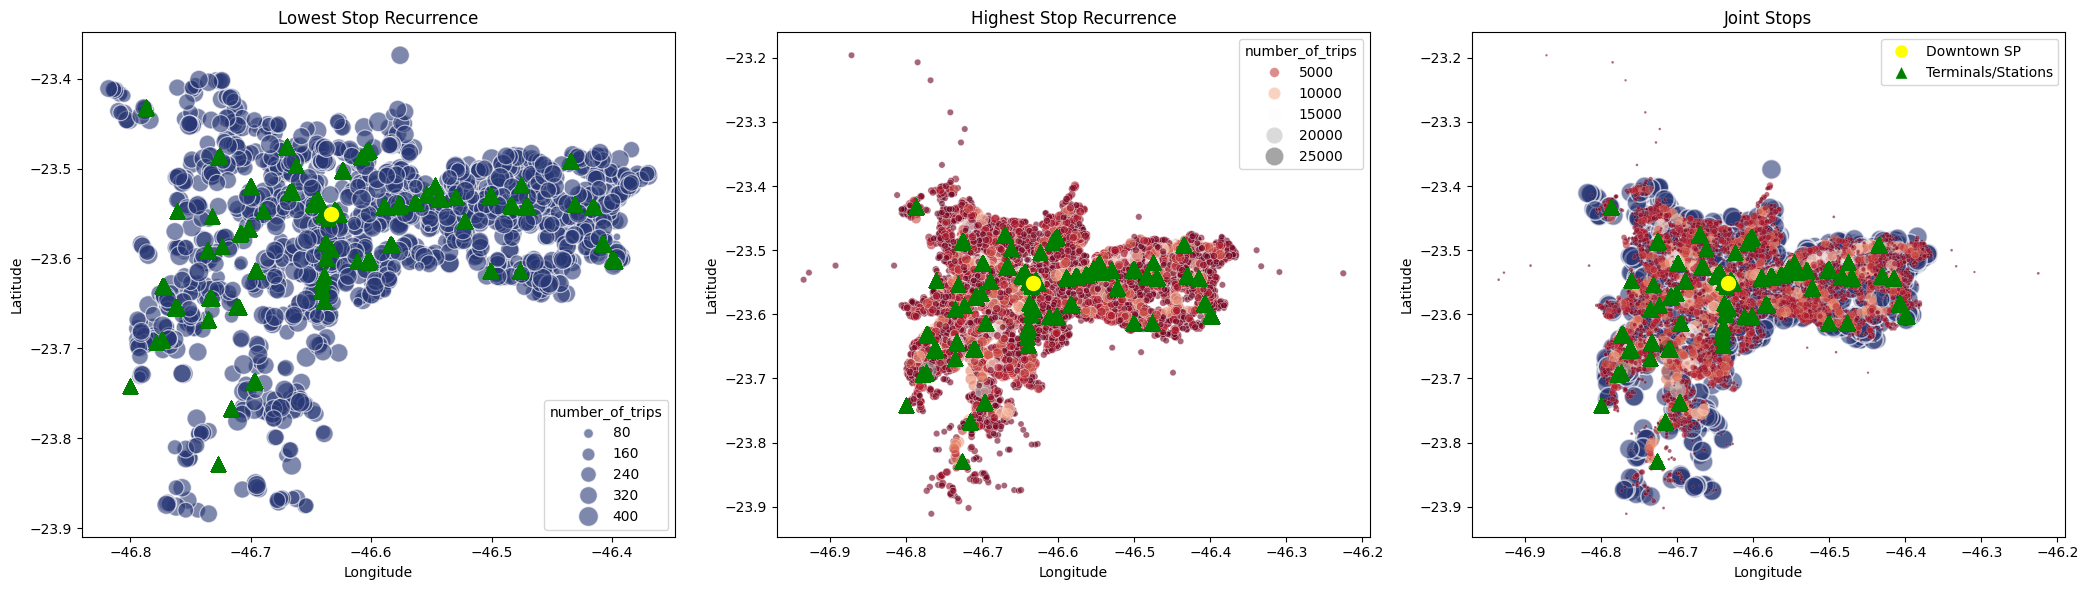

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

centro_sao_paulo = [-46.6333, -23.5505]

heatmap_data['number_of_trips'] = heatmap_data['quantidade_viagens']
heatmap_data_minimo_viagem = heatmap_data[heatmap_data['number_of_trips'] <= 400]
heatmap_data_viagem = heatmap_data[heatmap_data['number_of_trips'] > 400]

fig = plt.figure(figsize=(21, 6))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1])

ax0 = plt.subplot(gs[0])
sns.scatterplot(data=heatmap_data_minimo_viagem, x='stop_lon', y='stop_lat', size='number_of_trips',
                sizes=(20, 200), color='#283775', alpha=0.6, ax=ax0)

ax0.scatter(terminais_metro['stop_lon'], terminais_metro['stop_lat'],
            color='green', s=100, label='Terminals/Stations', marker='^')

ax0.scatter(centro_sao_paulo[0], centro_sao_paulo[1], color='yellow', s=100, label='Downtown SP')

ax0.set_xlabel('Longitude')
ax0.set_ylabel('Latitude')
ax0.set_title('Lowest Stop Recurrence')
ax2.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='Downtown SP'),
    plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='green', markersize=10, label='Terminals/Stations')
])

ax1 = plt.subplot(gs[1])
sns.scatterplot(data=heatmap_data_viagem, x='stop_lon', y='stop_lat', size='number_of_trips',
                hue='number_of_trips', sizes=(20, 200), palette='RdGy', alpha=0.6, ax=ax1)

ax1.scatter(terminais_metro['stop_lon'], terminais_metro['stop_lat'],
            color='green', s=100, label='Terminals/Stations', marker='^')

ax1.scatter(centro_sao_paulo[0], centro_sao_paulo[1], color='yellow', s=100, label='Downtown SP')

ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_title('Highest Stop Recurrence')
ax2.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='Downtown SP'),
    plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='green', markersize=10, label='Terminals/Stations')
])

ax2 = plt.subplot(gs[2])

sns.scatterplot(data=heatmap_data_minimo_viagem, x='stop_lon', y='stop_lat', size='number_of_trips',
                sizes=(200, 200), color='#283775', alpha=0.6, ax=ax2)

sns.scatterplot(data=heatmap_data_viagem, x='stop_lon', y='stop_lat', size='number_of_trips',
                hue='number_of_trips', sizes=(2, 200), palette='RdGy', alpha=0.6, ax=ax2)

ax2.scatter(terminais_metro['stop_lon'], terminais_metro['stop_lat'],
            color='green', s=100, label='Terminals/Stations', marker='^')

ax2.scatter(centro_sao_paulo[0], centro_sao_paulo[1], color='yellow', s=100, label='Downtown SP')

ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.set_title('Joint Stops')
ax2.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='Downtown SP'),
    plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='green', markersize=10, label='Terminals/Stations')
])
plt.tight_layout()
plt.show()

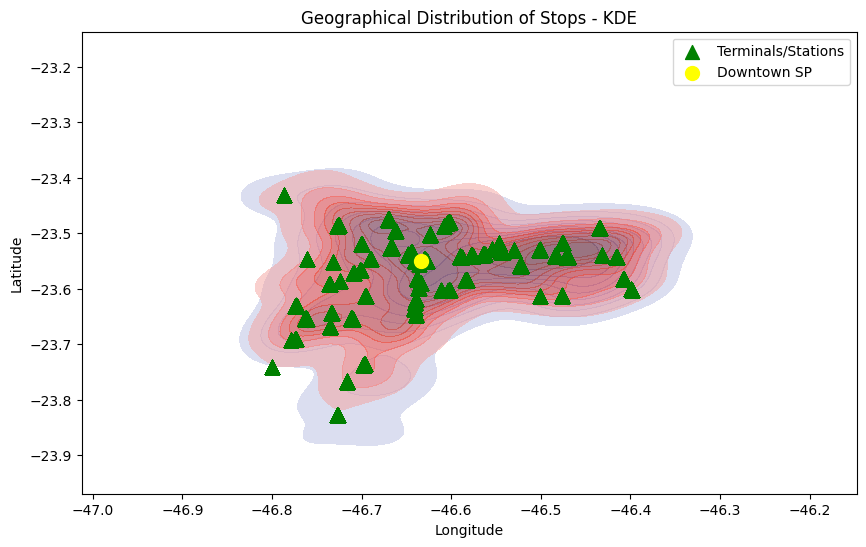

In [170]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data=heatmap_data_minimo_viagem, x='stop_lon', y='stop_lat',
            fill=True, color='#283775', alpha=0.5, label='1 viagem')

sns.kdeplot(data=heatmap_data_viagem, x='stop_lon', y='stop_lat',
            fill=True, color='#de3318', alpha=0.5, label='Mais de 1 viagem')

plt.scatter(terminais_metro['stop_lon'], terminais_metro['stop_lat'],
            color='green', s=100, label='Terminals/Stations', marker='^')

plt.scatter(centro_sao_paulo[0], centro_sao_paulo[1], color='yellow', s=100, label='Downtown SP')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Stops - KDE')
plt.legend()
plt.show()